In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random as randint
from time import sleep
import os

# League data files
nhl_team_path = 'Teams.csv'
master_path = 'Master.csv'



In [15]:
# Scraping for data

# Get url
url = 'https://www.hockey-reference.com/leagues/NHL_1964.html'

# Create data frame
league_data_1964 = pd.read_html(url)

league_data_1964

clean_df = league_data_1964[0]

clean_df


,Unnamed: 0,GP,W,L,T,PTS,PTS%,GF,GA,SRS,SOS
0,Montreal Canadiens*,70,36,21,13,85,0.607,209,167,0.50,-0.10
1,Chicago Black Hawks*,70,36,22,12,84,0.600,218,169,0.58,-0.12
2,Toronto Maple Leafs*,70,33,25,12,78,0.557,192,172,0.24,-0.05
3,Detroit Red Wings*,70,30,29,11,71,0.507,191,204,-0.16,0.03
4,New York Rangers,70,22,38,10,54,0.386,186,242,-0.67,0.13
5,Boston Bruins,70,18,40,12,48,0.343,170,212,-0.50,0.10


In [16]:
# Now let's try league data

league_url = 'https://www.hockey-reference.com/leagues/stats.html'

league_data = pd.read_html(url)

league_data

league_averages_df = league_data[0]

league_averages_df

,Unnamed: 0,GP,W,L,T,PTS,PTS%,GF,GA,SRS,SOS
0,Montreal Canadiens*,70,36,21,13,85,0.607,209,167,0.50,-0.10
1,Chicago Black Hawks*,70,36,22,12,84,0.600,218,169,0.58,-0.12
2,Toronto Maple Leafs*,70,33,25,12,78,0.557,192,172,0.24,-0.05
3,Detroit Red Wings*,70,30,29,11,71,0.507,191,204,-0.16,0.03
4,New York Rangers,70,22,38,10,54,0.386,186,242,-0.67,0.13
5,Boston Bruins,70,18,40,12,48,0.343,170,212,-0.50,0.10


In [19]:
# Let's just do it with a csv

league_averages_path = "league_averages.csv"

league_averages_df = pd.read_csv(league_averages_path)

league_averages_df

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2023-24,NHL,446,3.13,0.65,3.27,20.00,80.00,30.5,27.6,0.904,2.94
1,2,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
2,3,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92
3,4,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74
4,5,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,1921-22,NHL,48,3.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.88
102,103,1920-21,NHL,48,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19
103,104,1919-20,NHL,48,4.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70
104,105,1918-19,NHL,27,4.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05


In [26]:
# Clean up a little

# Drop rows with NaN values in any column
df_cleaned = league_averages_df.dropna()

# Identify the years that were excluded
excluded_years = league_averages_df['Season'].unique()[~league_averages_df['Season'].isin(df_cleaned['Season'])]

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)

# Display the excluded years
print("\nExcluded Years:")
print(excluded_years)


Cleaned DataFrame:
    Rk   Season   Lg    GP     G    PP   PPO    PP%    PK%    SA    SV    SV%  \
0    1  2023-24  NHL   446  3.13  0.65  3.27  20.00  80.00  30.5  27.6  0.904   
1    2  2022-23  NHL  1312  3.18  0.65  3.07  21.31  78.69  31.1  28.1  0.904   
2    3  2021-22  NHL  1312  3.14  0.60  2.89  20.61  79.39  31.4  28.5  0.907   
3    4  2020-21  NHL   868  2.94  0.57  2.89  19.78  80.22  29.8  27.1  0.908   
4    5  2019-20  NHL  1082  3.02  0.60  2.97  20.03  79.97  31.3  28.4  0.910   
5    6  2018-19  NHL  1271  3.01  0.58  2.92  19.78  80.22  31.3  28.5  0.910   
6    7  2017-18  NHL  1271  2.97  0.61  3.04  20.18  79.82  31.8  29.0  0.912   
7    8  2016-17  NHL  1230  2.77  0.57  2.99  19.10  80.90  30.1  27.5  0.913   
8    9  2015-16  NHL  1230  2.71  0.58  3.11  18.66  81.34  29.6  27.1  0.915   
9   10  2014-15  NHL  1230  2.73  0.57  3.06  18.66  81.34  29.8  27.3  0.915   
10  11  2013-14  NHL  1230  2.74  0.59  3.27  17.89  82.11  30.0  27.4  0.914   
11  12  2

In [51]:
import pandas as pd

# Filter data for pre-Gretzky years (1963-64 to 1977-78)
pre_gretzky_df = df_cleaned[df_cleaned['Season'].between('1963-64', '1977-78')]

# Filter data for Gretzky years (1978-79 to 1998-99)
gretzky_df = df_cleaned[df_cleaned['Season'].between('1978-79', '1998-99')]

# Filter data for post-Gretzky years (1999-00 to 2023-24)
post_gretzky_df = df_cleaned[df_cleaned['Season'].between('1999-00', '2023-24')]

# Define the columns to compare
columns_to_compare = ['GP', 'G', 'SA', 'SV', 'SV%']

# Calculate means for pre-Gretzky years
pre_gretzky_means = pre_gretzky_df[columns_to_compare].mean()

# Calculate means for Gretzky years
gretzky_means = gretzky_df[columns_to_compare].mean()

# Calculate means for post-Gretzky years
post_gretzky_means = post_gretzky_df[columns_to_compare].mean()

# Display the means
print("Mean Metrics for Pre-Gretzky Years:")
print(pre_gretzky_means)

print("\nMean Metrics for Gretzky Years:")
print(gretzky_means)

print("\nMean Metrics for Post-Gretzky Years:")
print(post_gretzky_means)


Mean Metrics for Pre-Gretzky Years:
GP     494.400000
G        3.098667
SA      31.126667
SV      28.080000
SV%      0.901600
dtype: float64

Mean Metrics for Gretzky Years:
GP     889.000000
G        3.497619
SA      29.947619
SV      26.538095
SV%      0.885857
dtype: float64

Mean Metrics for Post-Gretzky Years:
GP     1161.666667
G         2.853750
SA       29.737500
SV       27.045833
SV%       0.909167
dtype: float64


t-Test for Games Played (GP): t-statistic = -10.03300757759534, p-value = 4.193625944227518e-12


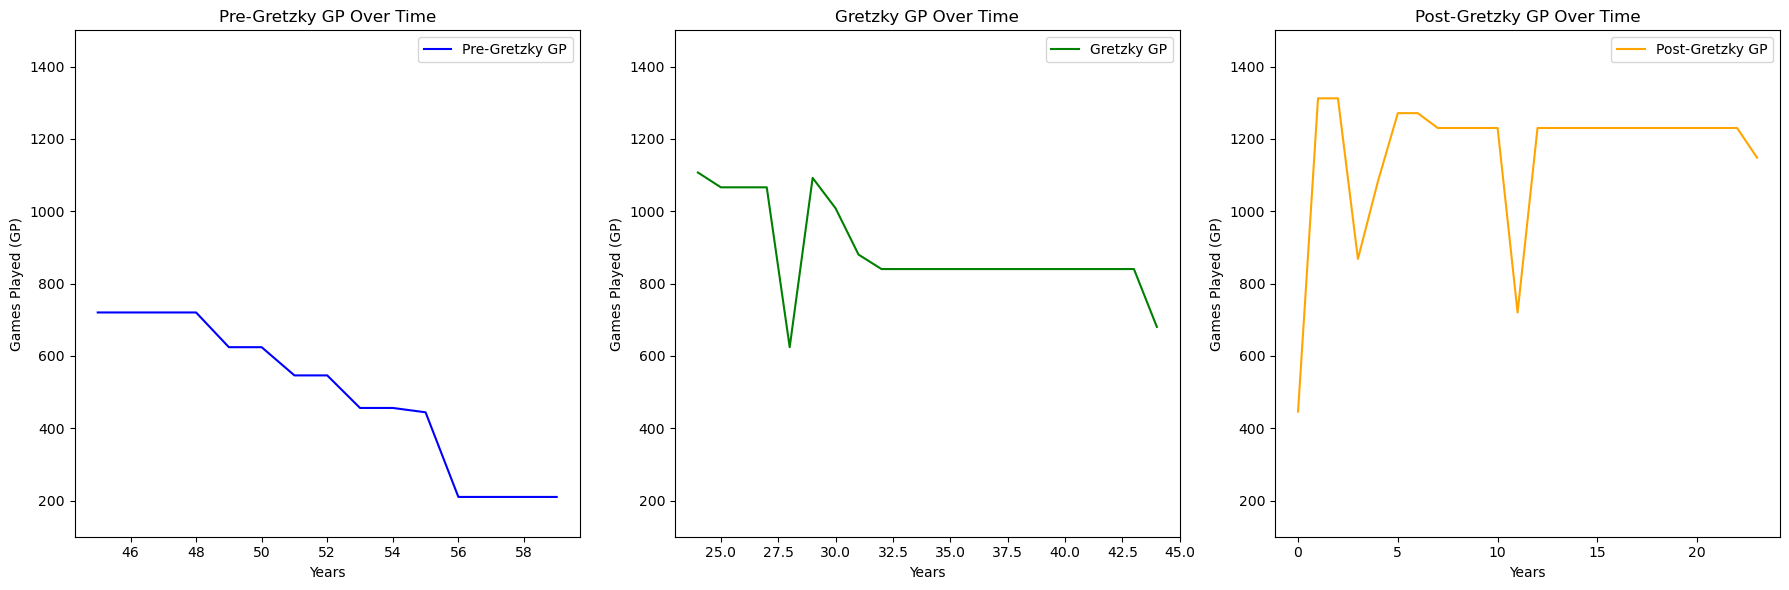

In [52]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Extract GP data for each period
pre_gretzky_gp = pre_gretzky_df['GP']
gretzky_gp = gretzky_df['GP']
post_gretzky_gp = post_gretzky_df['GP']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot GP for each period
axs[0].plot(pre_gretzky_gp.index, pre_gretzky_gp, label='Pre-Gretzky GP', color='blue')
axs[1].plot(gretzky_gp.index, gretzky_gp, label='Gretzky GP', color='green')
axs[2].plot(post_gretzky_gp.index, post_gretzky_gp, label='Post-Gretzky GP', color='orange')

# Set titles and labels
axs[0].set_title('Pre-Gretzky GP Over Time')
axs[1].set_title('Gretzky GP Over Time')
axs[2].set_title('Post-Gretzky GP Over Time')

for ax in axs:
    ax.set_xlabel('Years')
    ax.set_ylabel('Games Played (GP)')
    ax.legend()
    ax.set_ylim(100, 1500)  # Set Y-axis range from 200 to 1200

# Perform t-test for GP
t_stat, p_value = ttest_ind(pre_gretzky_gp, post_gretzky_gp)
print(f"t-Test for Games Played (GP): t-statistic = {t_stat}, p-value = {p_value}")

plt.tight_layout()
plt.show()


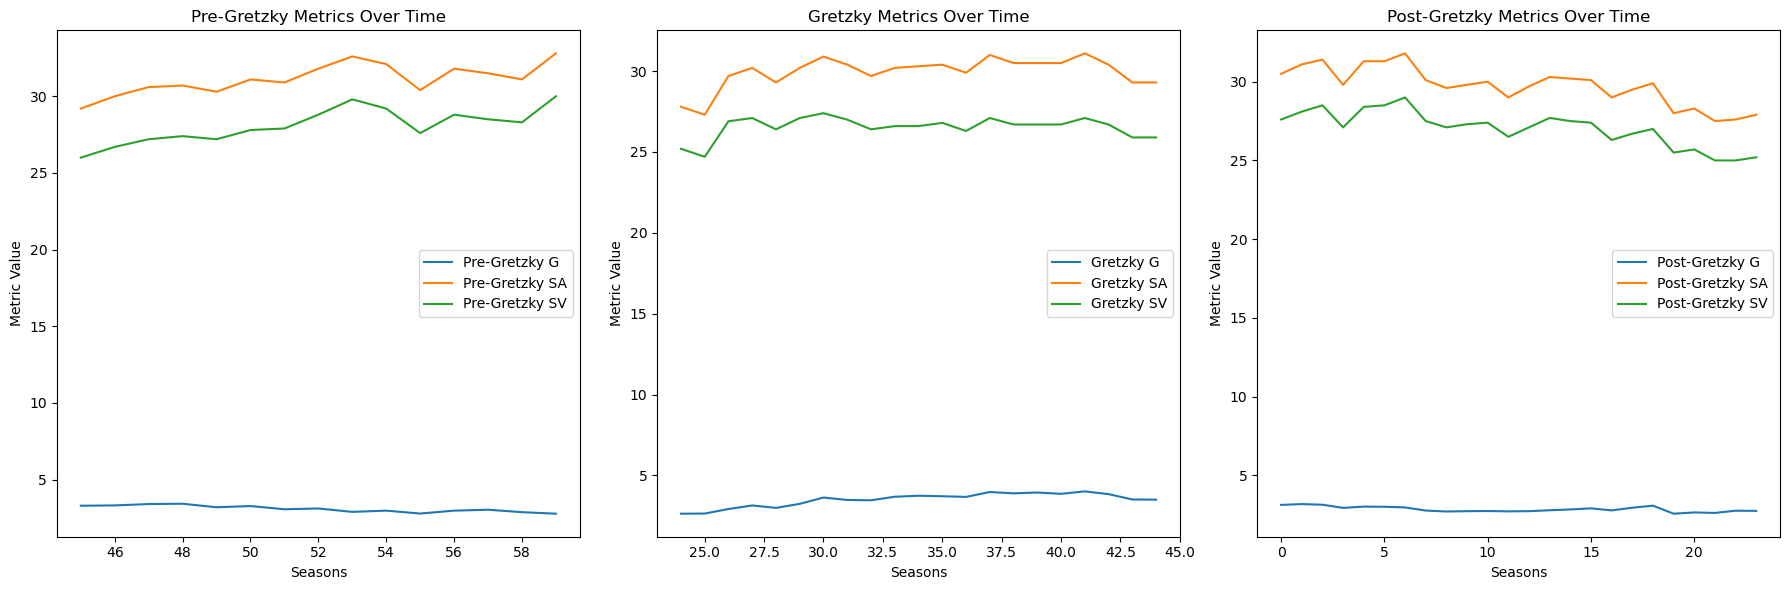

t-Test for G: t-statistic = 3.8916309773224302, p-value = 0.00040058688755597173
t-Test for SA: t-statistic = 3.7014886329345345, p-value = 0.0006945661184151678
t-Test for SV: t-statistic = 2.782959892361752, p-value = 0.008432209202206895


In [53]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the columns to compare
columns_to_compare = ['G', 'SA', 'SV']

# Function to plot metrics over time
def plot_metrics(ax, df, label):
    ax.plot(df.index, df['G'], label=f'{label} G')
    ax.plot(df.index, df['SA'], label=f'{label} SA')
    ax.plot(df.index, df['SV'], label=f'{label} SV')
    ax.set_title(f'{label} Metrics Over Time')
    ax.set_xlabel('Seasons')
    ax.set_ylabel('Metric Value')
    ax.legend()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot metrics for each period
plot_metrics(axs[0], pre_gretzky_df, 'Pre-Gretzky')
plot_metrics(axs[1], gretzky_df, 'Gretzky')
plot_metrics(axs[2], post_gretzky_df, 'Post-Gretzky')

plt.tight_layout()
plt.show()

# Perform t-tests
for column in columns_to_compare:
    t_stat, p_value = ttest_ind(pre_gretzky_df[column], post_gretzky_df[column])
    print(f"t-Test for {column}: t-statistic = {t_stat}, p-value = {p_value}")


In [63]:
import pandas as pd
from scipy.stats import ttest_ind


# Calculate per-game averages
def calculate_per_game_averages(df):
    per_game_df = df.copy()
    metrics_to_average = ['G', 'SA', 'SV', 'SV%']

    for metric in metrics_to_average:
        per_game_df[metric] = per_game_df[metric] / per_game_df['GP']

    return per_game_df

# Apply the function to each time period
per_game_pre_gretzky = calculate_per_game_averages(pre_gretzky_df)
per_game_gretzky = calculate_per_game_averages(gretzky_df)
per_game_post_gretzky = calculate_per_game_averages(post_gretzky_df)

# Perform t-tests
def perform_t_test(metric_name, series1, series2):
    t_statistic, p_value = ttest_ind(series1, series2)
    print(f"t-Test for {metric_name}: t-statistic = {t_statistic}, p-value = {p_value}")

metrics_to_test = ['G', 'SA', 'SV', 'SV%']

for metric in metrics_to_test:
    perform_t_test(metric, per_game_pre_gretzky[metric], per_game_gretzky[metric])
    perform_t_test(metric, per_game_pre_gretzky[metric], per_game_post_gretzky[metric])
    perform_t_test(metric, per_game_gretzky[metric], per_game_post_gretzky[metric])


t-Test for G: t-statistic = 4.122011321049923, p-value = 0.00022794027322222267
t-Test for G: t-statistic = 6.028524833248126, p-value = 5.744442157586291e-07
t-Test for G: t-statistic = 5.09366939007556, p-value = 7.444154322721897e-06
t-Test for SA: t-statistic = 4.511739797934938, p-value = 7.31032407193317e-05
t-Test for SA: t-statistic = 5.4715916818477, p-value = 3.262271697557875e-06
t-Test for SA: t-statistic = 3.07456505787898, p-value = 0.003655097929501683
t-Test for SV: t-statistic = 4.542718265243789, p-value = 6.672826185279909e-05
t-Test for SV: t-statistic = 5.405502961038525, p-value = 4.007798666041863e-06
t-Test for SV: t-statistic = 2.7363429213042174, p-value = 0.008994357770424928
t-Test for SV%: t-statistic = 4.511241746520276, p-value = 7.321049486335723e-05
t-Test for SV%: t-statistic = 5.388922167051075, p-value = 4.220089724026713e-06
t-Test for SV%: t-statistic = 2.7186404449851653, p-value = 0.009414002472026018


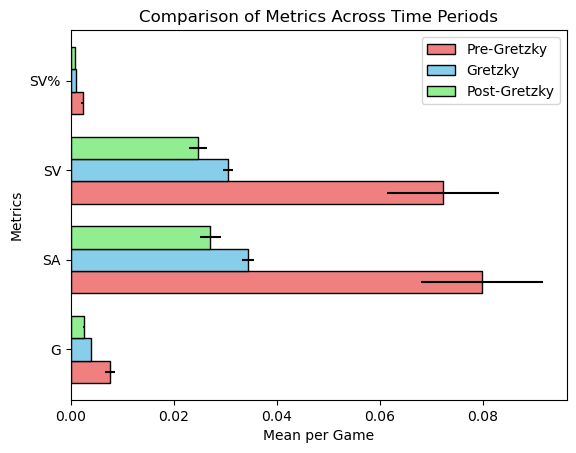

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to visualize
metrics = ['G', 'SA', 'SV', 'SV%']

# Data for each time period
means_pre_gretzky = [per_game_pre_gretzky[metric].mean() for metric in metrics]
means_gretzky = [per_game_gretzky[metric].mean() for metric in metrics]
means_post_gretzky = [per_game_post_gretzky[metric].mean() for metric in metrics]

# Standard errors for each time period
se_pre_gretzky = [per_game_pre_gretzky[metric].sem() for metric in metrics]
se_gretzky = [per_game_gretzky[metric].sem() for metric in metrics]
se_post_gretzky = [per_game_post_gretzky[metric].sem() for metric in metrics]

# Bar width
bar_width = 0.25

# X-axis positions
r_pre = np.arange(len(metrics))
r_gretzky = r_pre + bar_width
r_post = r_pre + 2 * bar_width

# Create a horizontal bar plot
plt.barh(r_pre, means_pre_gretzky, xerr=se_pre_gretzky, height=bar_width, align='center', label='Pre-Gretzky', color='lightcoral', edgecolor='black')
plt.barh(r_gretzky, means_gretzky, xerr=se_gretzky, height=bar_width, align='center', label='Gretzky', color='skyblue', edgecolor='black')
plt.barh(r_post, means_post_gretzky, xerr=se_post_gretzky, height=bar_width, align='center', label='Post-Gretzky', color='lightgreen', edgecolor='black')

# Set y-ticks and labels
plt.yticks(r_gretzky, metrics)
plt.ylabel('Metrics')
plt.xlabel('Mean per Game')
plt.title('Comparison of Metrics Across Time Periods')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to visualize
metrics = ['G', 'SA', 'SV', 'SV%']

# Data for each time period
means_pre_gretzky = [per_game_pre_gretzky[metric].mean() for metric in metrics]
means_gretzky = [per_game_gretzky[metric].mean() for metric in metrics]
means_post_gretzky = [per_game_post_gretzky[metric].mean() for metric in metrics]

# Standard errors for each time period
se_pre_gretzky = [per_game_pre_gretzky[metric].sem() for metric in metrics]
se_gretzky = [per_game_gretzky[metric].sem() for metric in metrics]
se_post_gretzky = [per_game_post_gretzky[metric].sem() for metric in metrics]

# P-values for each metric
p_values_pre_gretzky = [p_values_pre_gretzky[metric] for metric in metrics]
p_values_gretzky = [p_values_gretzky[metric] for metric in metrics]
p_values_post_gretzky = [p_values_post_gretzky[metric] for metric in metrics]

# Bar width
bar_width = 0.25

# X-axis positions
r_pre = np.arange(len(metrics))
r_gretzky = r_pre + bar_width
r_post = r_pre + 2 * bar_width

# Create a horizontal bar plot
plt.barh(r_pre, means_pre_gretzky, xerr=se_pre_gretzky, height=bar_width, align='center', label='Pre-Gretzky', color='lightcoral', edgecolor='black')
plt.barh(r_gretzky, means_gretzky, xerr=se_gretzky, height=bar_width, align='center', label='Gretzky', color='skyblue', edgecolor='black')
plt.barh(r_post, means_post_gretzky, xerr=se_post_gretzky, height=bar_width, align='center', label='Post-Gretzky', color='lightgreen', edgecolor='black')

# Add significance stars
for i in range(len(metrics)):
    stars = ['' if p > 0.05 else '*' if p > 0.01 else '**' if p > 0.001 else '***' for p in [p_values_pre_gretzky[i], p_values_gretzky[i], p_values_post_gretzky[i]]]
    for j, star in enumerate(stars):
        plt.text(0.5, r_pre[i] + j * bar_width, star, verticalalignment='center', horizontalalignment='center', color='red', fontsize=12)

# Set y-ticks and labels
plt.yticks(r_gretzky, metrics)
plt.ylabel('Metrics')
plt.xlabel('Mean per Game')
plt.title('Comparison of Metrics Across Time Periods')

# Add a legend
plt.legend()

# Show the plot
plt.show()


NameError: name 'p_values_pre_gretzky' is not defined